In [1]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [3]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y) 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# 학습용 데이터 형태 살펴보기

x_train.shape

(60000, 28, 28)

In [7]:
# 학습용 첫 번째 데이터 살펴보기1

x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 학습용 첫 번째 데이터 살펴보기2

for x in x_train[0]:
    for i in x:
        print('{:3}'.format(i), end = ' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [13]:
# 데이터 전처리(0 ~ 1 사이 숫자로)
x_train = x_train / 255
x_test = x_test / 255

In [14]:
# 데이터 전처리 결과 확인
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 확률 출력해준다
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
# 모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2101 - acc: 0.9370
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0892 - acc: 0.9723
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0634 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0480 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0382 - acc: 0.9878


In [19]:
# 모델 평가
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0766 - acc: 0.9772


[0.07661776313284645, 0.9772]

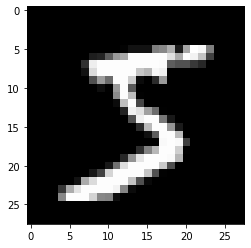

In [20]:
# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [21]:
# 예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1, 28, 28)))

[[8.4962672e-16 4.8742461e-11 2.2517221e-11 3.6208166e-05 6.7288419e-14
  9.9996376e-01 8.8673366e-12 3.2665148e-11 6.1112808e-12 6.6874772e-10]]


In [22]:
# 예측 - 0번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[0].reshape(1, 28, 28))))

5
